In [1]:
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_adata = ad.read_h5ad("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/Colab Notebooks-Joshua/data/shaffer_cancer/shaffer_train.h5ad")
test_adata = ad.read_h5ad("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/Colab Notebooks-Joshua/data/shaffer_cancer/shaffer_test.h5ad")

In [3]:
train_adata

AnnData object with n_obs × n_vars = 20656 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_lineage', 'nFeature_lineage', 'percent.mt', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.4', 'OG_condition', 'RNA_snn_res.0.3', 'Lineage', 'keep', 'clone_id'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
train_adata.obs['OG_condition']

cistodabtram_CCCGGAAAGCAACTCT-1    3
cistodabtram_CATTCATAGCTAATGA-1    3
cistodabtram_CCTCAGTTCCTCTTTC-1    3
cis_ACGATGTGTCGCGTTG-1             0
cistodabtram_TTCATGTAGGGAGATA-1    3
                                  ..
cocl2_TACGCTCAGCATGCAG-1           4
cocl2tocis_AAACCCACAATCCTAG-1      5
cocl2tocis_AGTGACTCAACCCGCA-1      5
cocl2tocis_GTGGGAATCTACAGGT-1      5
cocl2tocis_TACACCCAGACGGTTG-1      5
Name: OG_condition, Length: 20656, dtype: int32

In [5]:
test_adata

AnnData object with n_obs × n_vars = 2368 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_lineage', 'nFeature_lineage', 'percent.mt', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.4', 'OG_condition', 'RNA_snn_res.0.3', 'Lineage', 'keep', 'clone_id'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

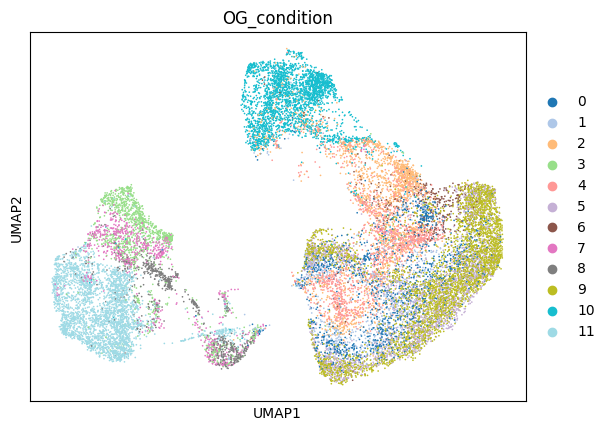

In [6]:
# Ensure seurat_clusters is categorical
train_adata.obs['OG_condition'] = train_adata.obs['OG_condition'].astype('category')

# Plot UMAP colored by seurat_clusters
sc.pl.umap(train_adata, color='OG_condition', palette='tab20')


In [7]:
# Load the embedding
new_embedding = np.load("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/Colab Notebooks-Joshua/output/LCL_2025/shaffer_cancer/feat_shaffer_lambda1_unlab5_bs100/scBaseEncoderFeat_Z_bs100_tau0.5.npy")

# Check shape: should be (n_cells, n_features) and match adata.n_obs
print(new_embedding.shape, train_adata.n_obs)

# Attach as new obsm entry
train_adata.obsm["X_LCL"] = new_embedding

(20656, 64) 20656


In [8]:
original_umap_layout = train_adata.obsm['X_umap'].copy()

# Step 1: Compute neighbors using the custom embedding
sc.pp.neighbors(train_adata, use_rep='X_LCL')

# Step 2: Compute UMAP
sc.tl.umap(train_adata)

# 3. Save the UMAP layout under a new key
train_adata.obsm["X_umap_LCL"] = train_adata.obsm["X_umap"].copy()

# 4. (Optional) Restore the original UMAP if needed
train_adata.obsm["X_umap"] = original_umap_layout

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/miniconda3/envs/scVI/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


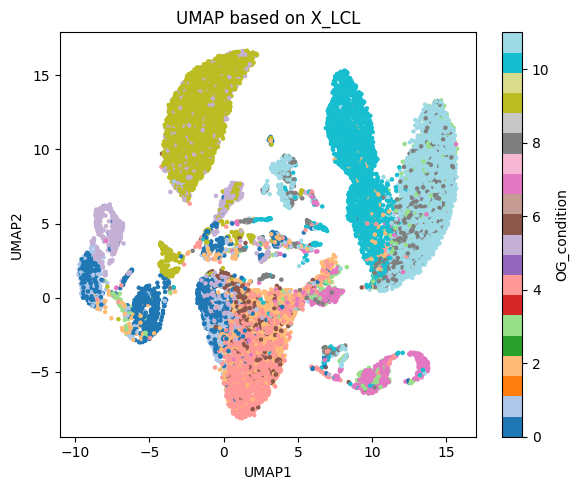

In [9]:
umap_coords = train_adata.obsm["X_umap_LCL"]
cluster_labels = train_adata.obs["OG_condition"].astype("category").cat.codes

plt.figure(figsize=(6, 5))
plt.scatter(umap_coords[:, 0], umap_coords[:, 1], c=cluster_labels, cmap='tab20', s=5)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP based on X_LCL")
plt.colorbar(label="OG_condition")
plt.tight_layout()
plt.show()


In [10]:
train_adata

AnnData object with n_obs × n_vars = 20656 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_lineage', 'nFeature_lineage', 'percent.mt', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.4', 'OG_condition', 'RNA_snn_res.0.3', 'Lineage', 'keep', 'clone_id'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'OG_condition_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_LCL', 'X_umap_LCL'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [11]:
df = pd.DataFrame(train_adata.obsm["X_LCL"], index=train_adata.obs_names)
df.to_csv("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/kevin/Writuep9/train_adata_LCL.csv")

In [12]:
# Load the embedding
new_embedding = np.load("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/Colab Notebooks-Joshua/output/LCL_2025/shaffer_cancer/feat_shaffer_lambda1_unlab5_bs100/test_embedding.npy")

# Check shape: should be (n_cells, n_features) and match adata.n_obs
print(new_embedding.shape, test_adata.n_obs)

# Attach as new obsm entry
test_adata.obsm["X_LCL"] = new_embedding

(2368, 64) 2368


In [13]:
df = pd.DataFrame(test_adata.obsm["X_LCL"], index=test_adata.obs_names)
df.to_csv("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/kevin/Writuep9/test_adata_LCL.csv")